In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [12]:
import numpy as np
import pandas as pd
import h5py
import python_utils_jjm as utils_jjm
from tqdm import tqdm
from scipy import stats
from scipy import signal 
from importlib import reload
from matplotlib import pyplot as plt
import itertools
import miniscope_analysis as ma

In [95]:
dir_path = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/'

In [96]:
mouse = 'GRIN011'

In [97]:
session = pd.read_hdf(dir_path+mouse+'_aligned_to_behavior.h5')

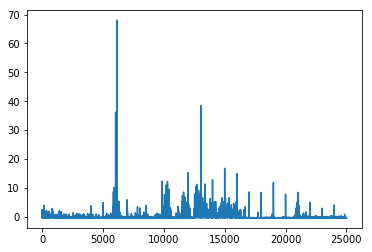

In [98]:
## behavior trace should now be roughly 20 fps 
plt.plot(session['behavior']['velocity_z_score'])

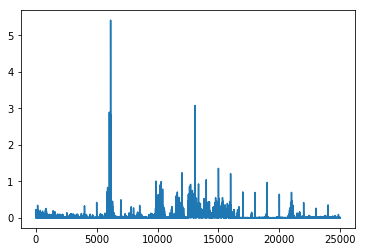

In [99]:
plt.plot(session['behavior']['velocity'])

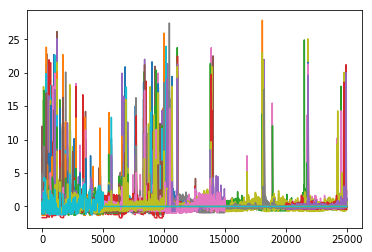

In [100]:
plt.plot(session['C_z_scored'])
plt.show()

In [101]:
#get time where velocity crosses threshold 

sample_points = ma.count_events_in_array(session['behavior']['velocity_z_score'].values, 50, 0.1, threshold=3, up=True)[1]
sorted = []
fs = 20
# select events where mouse was not moving for 4 seconds before moving 
time_sort = (5*20, 1*20)
for event in sample_points:
    # sort based on velocity before movement  
    if len(ma.count_events_in_array(session['behavior']['velocity_z_score'].values[event-time_sort[0]:event-time_sort[1]], 50, 0.1, threshold=1, up=True)[1]) == 0:
        sorted.append(event)
sorted = np.array(sorted)

In [102]:
len(sorted)

25

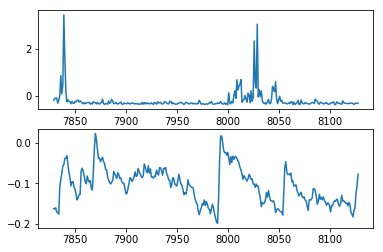

In [103]:
# plot individual detected events 
to_plot = (10*20, 5*20)

event = sorted[10]

plt.subplot(2, 1, 1)
plt.plot(session['behavior']['velocity_z_score'][event-to_plot[0]:event+to_plot[1]])
plt.subplot(2, 1, 2)
plt.plot(session['C_z_scored'].mean(axis=1)[event-to_plot[0]:event+to_plot[1]])

In [104]:
# plot averages 
triggered_events_v = []
triggered_events_f = [ ]
to_plot = (10*20, 5*20)
for event in sorted:
    triggered_events_v.append(session['behavior']['velocity_z_score'][event-to_plot[0]:event+to_plot[1]].reset_index(drop=True))
    triggered_events_f.append(session['C_z_scored'][event-to_plot[0]:event+to_plot[1]].reset_index(drop=True))
combined_f = pd.concat(triggered_events_f, axis=1, ignore_index=True)
combined_v = pd.concat(triggered_events_v, axis=1, ignore_index=True)
combined = pd.concat([combined_f, combined_v], axis=1, keys=['fluorescence_z_score', 'velocity_z_score'])
combined.to_csv(dir_path+mouse+'_velocity_triggered_events.h5')

In [105]:
combined.shape

(300, 3025)

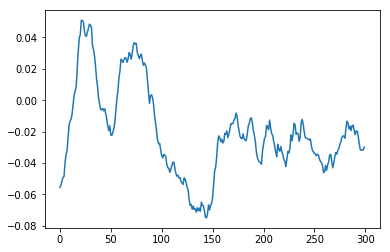

In [106]:
plt.plot(combined_f.mean(axis=1))

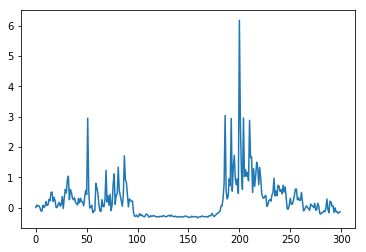

In [107]:
plt.plot(combined_v.mean(axis=1))

In [108]:
#combined_by_mouse=[]
#mouse_names = []

In [109]:
combined_by_mouse.append(combined)
mouse_names.append(mouse)

In [110]:
mouse_names

['GRIN018', 'GRIN012', 'GRIN011']

In [111]:
#combined_by_mouse[0].head()

In [112]:
ko_combined = pd.concat(combined_by_mouse, axis =1, keys=mouse_names)


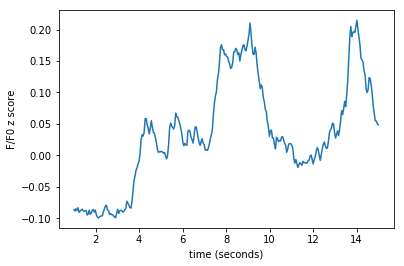

In [131]:
#wt_combined['fluorescence_z_score']
plt.plot(np.linspace(1, len(wt_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1))/20, 
                  len(wt_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1)),), 
                  wt_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1))
plt.ylabel('F/F0 z score')
plt.xlabel('time (seconds)')
plt.draw()
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/wt_flouro_events.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/wt_flouro_events.svg', transparent=True, format="svg")

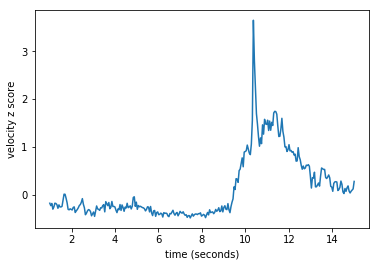

In [132]:
#wt_combined['fluorescence_z_score']
plt.plot(np.linspace(1, len(wt_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1))/20, 
                  len(wt_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1)),), 
                  wt_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1))
plt.ylabel('velocity z score')
plt.xlabel('time (seconds)')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/wt_velocity_events.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/wt_velocity_events.svg', transparent=True, format="svg")

Text(0.5, 0, 'time (seconds)')

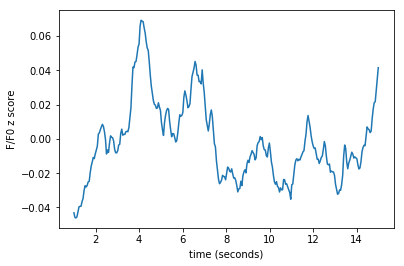

In [129]:
#wt_combined['fluorescence_z_score']
plt.plot(np.linspace(1, len(ko_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1))/20, 
                  len(ko_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1)),), 
                  ko_combined.xs('fluorescence_z_score', axis=1, level=1).mean(axis=1))
plt.ylabel('F/F0 z score')
plt.xlabel('time (seconds)')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/ko_fluoro_events.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/ko_fluoro_events.svg', transparent=True, format="svg")

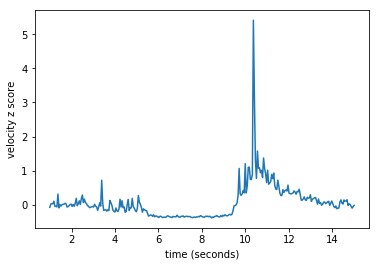

In [134]:
#wt_combined['fluorescence_z_score']
plt.plot(np.linspace(1, len(ko_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1))/20, 
                  len(ko_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1)),), 
                  ko_combined.xs('velocity_z_score', axis=1, level=1).mean(axis=1))
plt.ylabel('velocity z score')
plt.xlabel('time (seconds)')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/ko_velocity_events.png')
plt.savefig('/Users/johnmarshall/Documents/Presentations/Dec2019_progressreport/ko_velocity_events.svg', transparent=True, format="svg")

In [117]:
all_combined_events = pd.concat([wt_combined, ko_combined], axis=1, keys=['wt', 'ko'])

In [121]:
all_combined_events.to_hdf(dir_path+'_velocity_triggered_events.h5', key='df')